# FIFA World Cup 2022 Predictions

<img src="img/logo.jpg" alt="logo" width="750"/>

## 1) EDA

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [77]:
data = pd.read_csv('data/international_matches.csv', encoding='utf-8')

df = data.copy()

df.head()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
df.shape

(23921, 25)

In [79]:
cat = ['home_team', 'away_team', 'home_team_continent', 'away_team_continent', 'tournament', 'city', 'country', 'home_team_result']

for col in cat:
    print(f'{col :-<50} {df[col].nunique()}')

home_team----------------------------------------- 211
away_team----------------------------------------- 211
home_team_continent------------------------------- 6
away_team_continent------------------------------- 6
tournament---------------------------------------- 82
city---------------------------------------------- 1576
country------------------------------------------- 217
home_team_result---------------------------------- 3


In [80]:
df.describe()

,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
count,23921.000000,23921.000000,23921.000000,23921.000000,23921.000000,23921.000000,8379.000000,8095.000000,7787.000000,8510.000000,8162.000000,7564.000000,8312.000000,7979.000000
mean,77.854688,80.797375,323.401488,315.453576,1.609214,1.068266,74.963838,74.212477,74.903249,75.818743,75.889292,74.424379,75.420019,75.259143
std,52.355225,53.232902,500.825725,490.944273,1.630127,1.263944,8.212242,8.225919,6.003114,6.268416,6.053110,5.937425,6.201906,6.124573
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,47.000000,47.000000,52.800000,53.300000,54.200000,52.800000,53.300000,54.200000
25%,33.000000,36.000000,0.000000,0.000000,0.000000,0.000000,70.000000,69.000000,71.000000,71.700000,72.500000,70.500000,71.300000,71.800000
50%,71.000000,73.000000,0.000000,0.000000,1.000000,1.000000,75.000000,74.000000,75.200000,75.700000,76.200000,74.500000,75.300000,75.500000
75%,115.000000,119.000000,547.000000,523.000000,2.000000,2.000000,81.000000,80.000000,78.800000,80.000000,79.500000,78.200000,79.700000,79.000000
max,211.000000,211.000000,2164.000000,2164.000000,31.000000,21.000000,97.000000,97.000000,91.800000,93.000000,93.200000,91.800000,93.000000,93.200000


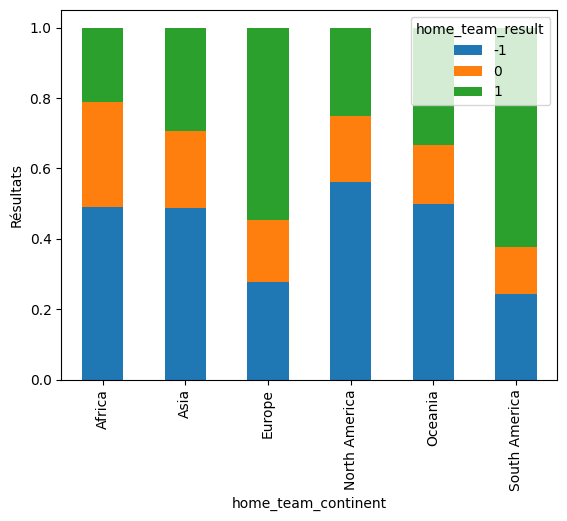

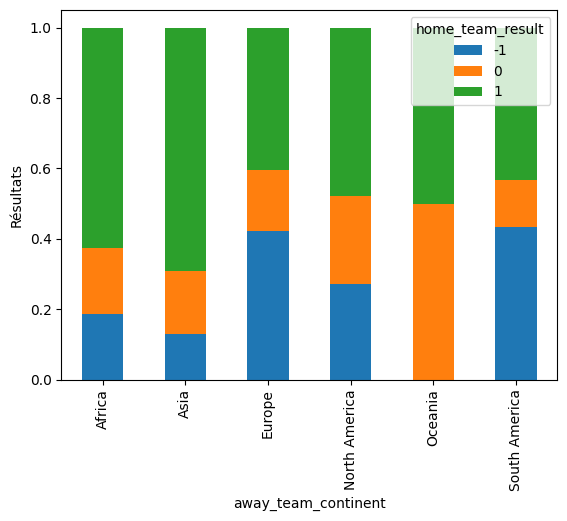

In [81]:
conts = ['home_team_continent', 'away_team_continent']

mask = (df['tournament']=='FIFA World Cup')

df_only_wc = df.loc[mask]

y =df_only_wc['home_team_result'].replace(['Win','Draw','Lose'], [1, 0, -1])

for col in conts:
    table = pd.crosstab(df_only_wc[col], y)
    table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
    plt.xlabel(col)
    plt.ylabel('Résultats')
    plt.show()

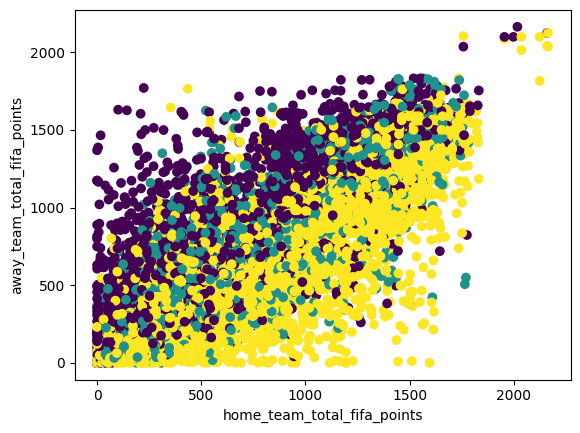

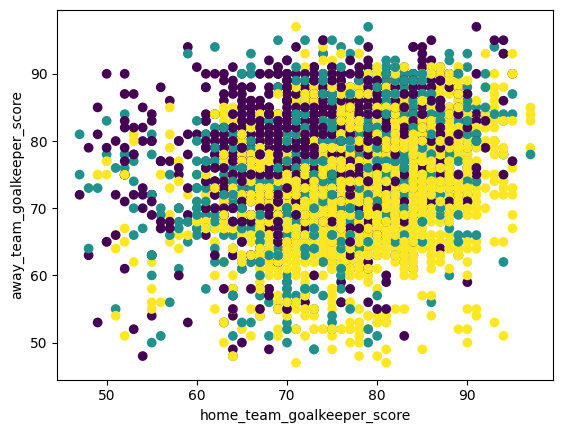

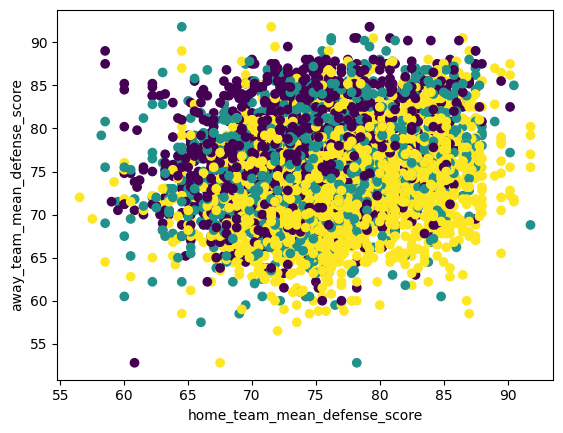

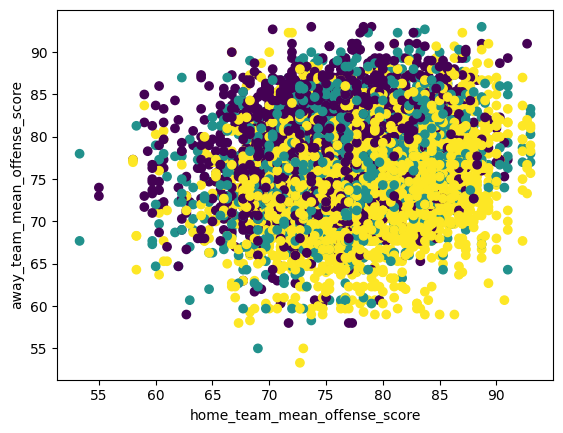

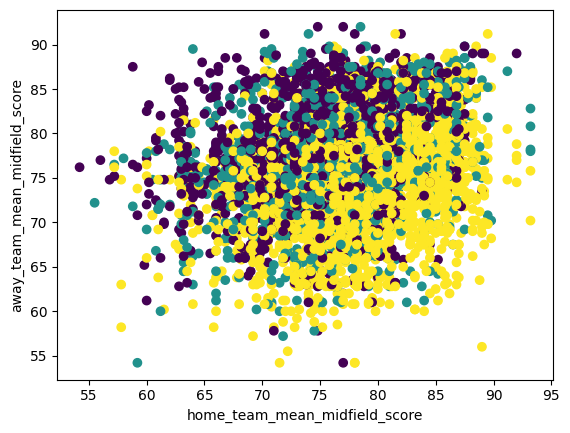

In [82]:
cols_num = ['_team_total_fifa_points','_team_goalkeeper_score','_team_mean_defense_score','_team_mean_offense_score','_team_mean_midfield_score']

y = df['home_team_result'].replace(['Win','Draw','Lose'], [1, 0, -1])

for col in cols_num:
    plt.scatter(df['home'+col], df['away'+col], c=y)
    plt.xlabel('home'+col)
    plt.ylabel('away'+col)
    plt.show()

In [83]:
(df.isnull().sum()/df.shape[0]).sort_values(ascending=True) * 100

date                              0.000000
home_team_result                  0.000000
shoot_out                         0.000000
neutral_location                  0.000000
country                           0.000000
tournament                        0.000000
away_team_score                   0.000000
home_team_score                   0.000000
city                              0.000000
home_team_total_fifa_points       0.000000
away_team_fifa_rank               0.000000
home_team_fifa_rank               0.000000
away_team_continent               0.000000
home_team_continent               0.000000
away_team                         0.000000
home_team                         0.000000
away_team_total_fifa_points       0.000000
home_team_mean_offense_score     64.424564
home_team_goalkeeper_score       64.972200
away_team_mean_offense_score     65.252289
home_team_mean_midfield_score    65.879353
away_team_goalkeeper_score       66.159441
away_team_mean_midfield_score    66.644371
home_team_m

In [84]:
df['year'] = df['date'].str[:4]

df['year'] = pd.to_numeric(df['year'])

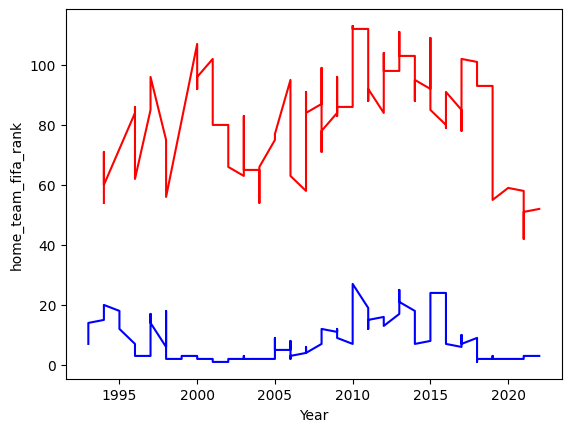

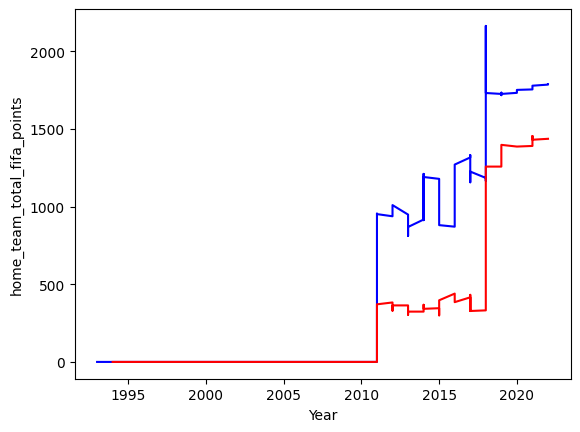

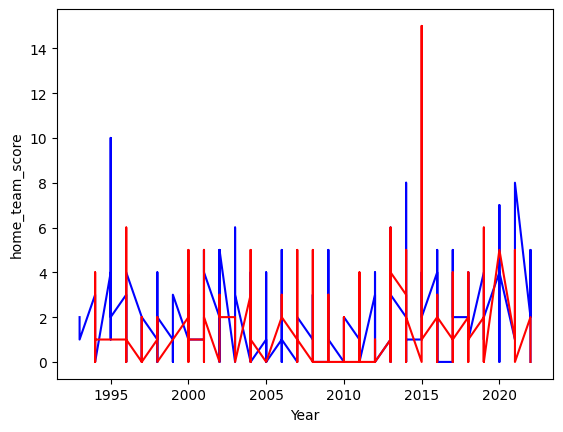

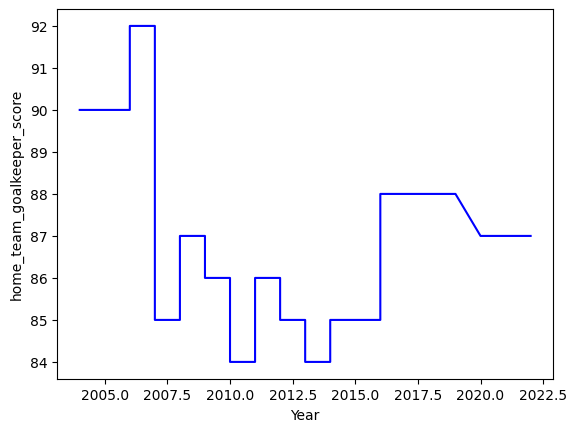

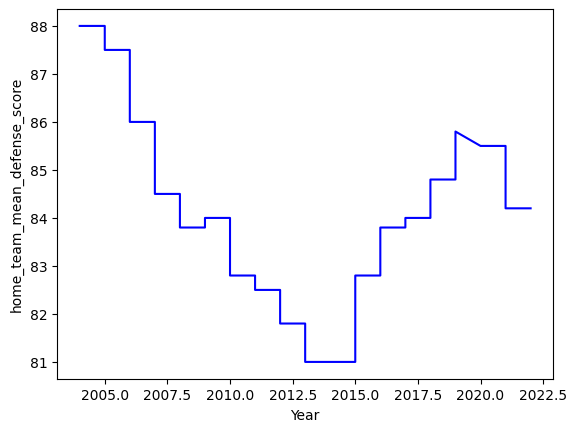

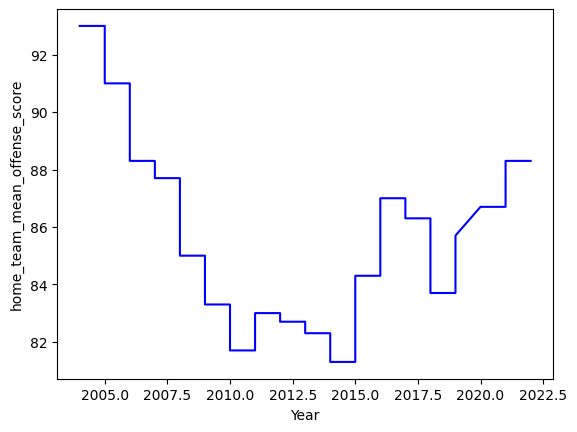

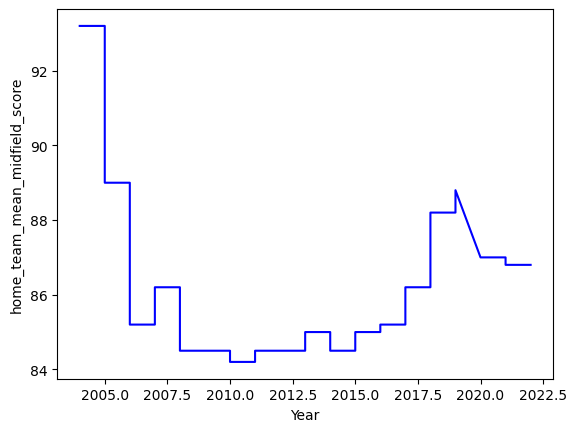

In [85]:
check_values_by_dates = ['home_team_fifa_rank','home_team_total_fifa_points','home_team_score','home_team_goalkeeper_score',
                        'home_team_mean_defense_score','home_team_mean_offense_score','home_team_mean_midfield_score']


mask_france = (df['home_team'] == ('France'))

mask_qatar = (df['home_team'] == ('Qatar'))

france_df=df.loc[mask_france]
qatar_df=df.loc[mask_qatar]

for col in check_values_by_dates:
    plt.plot(france_df['year'], france_df[col], c='b')
    plt.plot(qatar_df['year'], qatar_df[col], c='r')
    plt.xlabel('Year')
    plt.ylabel(col)
    plt.show()

## 2) Training

In [141]:
mask_all_data = (df['year']>=2012)

work_df = df.loc[mask_all_data]

work_df['month'] = work_df['date'].str[5:7]

work_df['is_stake'] = work_df['tournament'] != 'Friendly'

work_df['is_world_cup'] = work_df['tournament'] == 'FIFA World Cup'

work_df['home_team_result']=work_df['home_team_result'].replace(['Lose','Draw', 'Win'], [-1, 0, 1])

work_df.drop(['date', 'home_team_score', 'away_team_score', 'city', 'tournament', 'country', 'shoot_out'], axis=1, inplace=True)

work_df.head()

C:\Users\bapti\AppData\Local\Temp\ipykernel_13796\393572407.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  work_df['month'] = work_df['date'].str[5:7]
C:\Users\bapti\AppData\Local\Temp\ipykernel_13796\393572407.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  work_df['is_stake'] = work_df['tournament'] != 'Friendly'
C:\Users\bapti\AppData\Local\Temp\ipykernel_13796\393572407.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,neutral_location,home_team_result,...,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,year,month,is_stake,is_world_cup
14723,Equatorial Guinea,South Africa,Africa,Africa,150,52,147,577,False,0,...,NaN,60.0,NaN,69.8,72.0,75.2,2012,01,False,False
14724,Botswana,Zimbabwe,Africa,Africa,95,98,371,354,False,0,...,NaN,NaN,NaN,64.2,69.0,62.8,2012,01,False,False
14725,Gabon,Burkina Faso,Africa,Africa,77,62,445,517,False,0,...,NaN,74.3,NaN,NaN,72.3,NaN,2012,01,False,False
14726,Tunisia,Sudan,Africa,Africa,59,113,537,297,True,1,...,75.0,72.3,71.8,NaN,NaN,NaN,2012,01,False,False
14727,Nigeria,Angola,Africa,Africa,43,83,627,411,False,0,...,74.5,77.7,76.2,60.5,71.3,NaN,2012,01,False,False


In [142]:
work_df.shape

(9198, 22)

In [143]:
(work_df.isnull().sum()/work_df.shape[0]).sort_values(ascending=True) * 100

home_team                         0.000000
month                             0.000000
year                              0.000000
is_stake                          0.000000
home_team_result                  0.000000
neutral_location                  0.000000
away_team_total_fifa_points       0.000000
is_world_cup                      0.000000
away_team_fifa_rank               0.000000
home_team_fifa_rank               0.000000
away_team_continent               0.000000
home_team_continent               0.000000
away_team                         0.000000
home_team_total_fifa_points       0.000000
home_team_goalkeeper_score       42.465753
home_team_mean_offense_score     44.096543
home_team_mean_midfield_score    44.205262
away_team_goalkeeper_score       45.096760
away_team_mean_midfield_score    45.640357
away_team_mean_offense_score     45.966514
home_team_mean_defense_score     46.825397
away_team_mean_defense_score     49.151990
dtype: float64

In [144]:
def fill_empty(df):

    fill0 = ['home_team_goalkeeper_score','away_team_goalkeeper_score','home_team_mean_defense_score','home_team_mean_offense_score',
            'home_team_mean_midfield_score','away_team_mean_defense_score','away_team_mean_offense_score','away_team_mean_midfield_score']

    for col in fill0:
        df[col].fillna(0, inplace=True)
        
    return df


In [145]:
def encodage(df):
    
    cat_bool = ['neutral_location', 'is_stake', 'is_world_cup']

    for col in cat_bool:
        df[col]=df[col].replace([False,True], [0, 1])
    
    cat_to_encode = ['home_team_continent','away_team_continent']

    encoded_df = pd.get_dummies(df[cat_to_encode])

    others_cols_df = df.drop(columns=cat_to_encode)

    output_df = pd.concat([others_cols_df, encoded_df], axis=1)

    return output_df

In [146]:
def preprocessing(df):

    df = fill_empty(df)
    df = encodage(df)

    return df

In [147]:
work_df = preprocessing(work_df)

work_df.drop('home_team', axis=1, inplace=True)
work_df.drop('away_team', axis=1, inplace=True)


C:\Users\bapti\AppData\Local\Temp\ipykernel_13796\2750871429.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(0, inplace=True)
C:\Users\bapti\AppData\Local\Temp\ipykernel_13796\3855519255.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]=df[col].replace([False,True], [0, 1])


In [148]:
work_df.head()

,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,neutral_location,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,...,home_team_continent_Europe,home_team_continent_North America,home_team_continent_Oceania,home_team_continent_South America,away_team_continent_Africa,away_team_continent_Asia,away_team_continent_Europe,away_team_continent_North America,away_team_continent_Oceania,away_team_continent_South America
14723,150,52,147,577,0,0,0.0,76.0,0.0,60.0,...,0,0,0,0,1,0,0,0,0,0
14724,95,98,371,354,0,0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
14725,77,62,445,517,0,0,67.0,0.0,0.0,74.3,...,0,0,0,0,1,0,0,0,0,0
14726,59,113,537,297,1,1,67.0,0.0,75.0,72.3,...,0,0,0,0,1,0,0,0,0,0
14727,43,83,627,411,0,0,76.0,60.0,74.5,77.7,...,0,0,0,0,1,0,0,0,0,0


In [149]:
work_df.shape

(9198, 30)

In [150]:
from sklearn.model_selection import train_test_split

X = work_df.drop('home_team_result', axis=1)
y = work_df['home_team_result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [151]:
from sklearn.preprocessing import RobustScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif 
model = make_pipeline(RobustScaler(), SelectKBest(f_classif, k=29), LogisticRegression())

In [152]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [153]:
def evaluation(model):

    model.fit(X_train, y_train)
        
    ypred = model.predict(X_test)
        
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))


In [154]:
evaluation(model)

[[309   3 220]
 [123   6 304]
 [109  10 756]]
              precision    recall  f1-score   support

          -1       0.57      0.58      0.58       532
           0       0.32      0.01      0.03       433
           1       0.59      0.86      0.70       875

    accuracy                           0.58      1840
   macro avg       0.49      0.49      0.43      1840
weighted avg       0.52      0.58      0.51      1840



c:\Users\bapti\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [155]:
from sklearn.model_selection import GridSearchCV

In [156]:
hyper_params = {'logisticregression__C': [1, 10, 100, 1000],
                'logisticregression__penalty' : ['l1', 'l2'],
                'logisticregression__solver' : ['liblinear'],
                'selectkbest__k': range(2,29)}

In [157]:
grid = GridSearchCV(model, hyper_params, scoring='precision', cv=4)
grid.fit(X_train, y_train)
print(grid.best_params_)
y_pred = grid.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

c:\Users\bapti\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\bapti\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\bapti\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "c:\Users\bapti\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\Users\bapti\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py", line 1776, in precision_score
    p, _, _, _ = precision_recall

{'logisticregression__C': 1, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear', 'selectkbest__k': 2}
              precision    recall  f1-score   support

          -1       0.52      0.52      0.52       532
           0       0.00      0.00      0.00       433
           1       0.57      0.86      0.69       875

    accuracy                           0.56      1840
   macro avg       0.36      0.46      0.40      1840
weighted avg       0.42      0.56      0.48      1840



c:\Users\bapti\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\bapti\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\bapti\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

## 3) Predictions

<img src="img/groups.jpg" alt="groups" width="750"/>

In [158]:
data2 = pd.read_csv('data/WC2022_teams.csv', encoding='utf-8')

data2.head()

,short_team,team,rank,points
0,QAT,Qatar,50,1440
1,ECU,Ecuador,44,1464
2,SEN,Senegal,18,1584
3,NED,Netherlands,8,1695
4,ENG,England,5,1728


In [159]:
world_cup_df = data2.copy()

world_cup_df.shape

(32, 4)

In [160]:
most_recent_mask=(df.groupby('home_team')['date'].transform('max') == df['date'])

most_recent_df=df[most_recent_mask]

most_recent_df.shape

(211, 26)

In [161]:
wc_teams_mask=(most_recent_df['home_team'].isin(world_cup_df['team'].unique()))
wc_teams_df=most_recent_df[wc_teams_mask]

wc_teams_df.shape

(32, 26)

In [162]:
team_cols=['home_team', 'home_team_continent', 'home_team_goalkeeper_score', 'home_team_mean_defense_score', 'home_team_mean_offense_score',
            'home_team_mean_midfield_score']
wc_teams_df = wc_teams_df[team_cols]

wc_teams_df=wc_teams_df.rename(columns={'home_team':'team', 'home_team_continent':'team_continent', 'home_team_goalkeeper_score':'team_goalkeeper_score',
                    'home_team_mean_defense_score':'team_mean_defense_score', 'home_team_mean_offense_score':'team_mean_offense_score', 
                    'home_team_mean_midfield_score':'team_mean_midfield_score'})
wc_teams_df.head()

,team,team_continent,team_goalkeeper_score,team_mean_defense_score,team_mean_offense_score,team_mean_midfield_score
23497,Brazil,South America,89.0,84.8,86.3,85.5
23516,Cameroon,Africa,67.0,76.8,77.7,75.0
23615,Qatar,Asia,NaN,NaN,NaN,NaN
23656,Ghana,Africa,74.0,75.5,76.0,78.2
23667,Tunisia,Africa,NaN,70.8,72.3,74.0


In [163]:
world_cup_df.head()

,short_team,team,rank,points
0,QAT,Qatar,50,1440
1,ECU,Ecuador,44,1464
2,SEN,Senegal,18,1584
3,NED,Netherlands,8,1695
4,ENG,England,5,1728


In [164]:
wc2022_teams_df = pd.merge(wc_teams_df,world_cup_df,on='team')

wc2022_teams_df.rename(columns={'rank':'team_fifa_rank','points':'team_total_fifa_points'}, inplace=True)

wc2022_teams_df.head()

,team,team_continent,team_goalkeeper_score,team_mean_defense_score,team_mean_offense_score,team_mean_midfield_score,short_team,team_fifa_rank,team_total_fifa_points
0,Brazil,South America,89.0,84.8,86.3,85.5,BRA,1,1841
1,Cameroon,Africa,67.0,76.8,77.7,75.0,CMR,43,1471
2,Qatar,Asia,NaN,NaN,NaN,NaN,QAT,50,1440
3,Ghana,Africa,74.0,75.5,76.0,78.2,GHA,61,1393
4,Tunisia,Africa,NaN,70.8,72.3,74.0,TUN,30,1508


In [165]:
data3 = pd.read_csv('data/match_schedule.csv', encoding='utf-8')

data3.head()

,home_short_team,away_short_team,group
0,QAT,ECU,A
1,ENG,IRN,B
2,SEN,NED,A
3,USA,WAL,B
4,ARG,KSA,C


In [166]:
match_schedule_df = data3.copy()

match_schedule_df.shape

(48, 3)

In [167]:
def df_preparation(df, month):
    output_df = pd.merge(df, wc2022_teams_df.add_prefix('home_'), on='home_short_team')
    output_df = pd.merge(output_df, wc2022_teams_df.add_prefix('away_'), on='away_short_team')
    output_df['year']=2022
    output_df['month']=month
    output_df['is_stake']=True
    output_df['is_world_cup']=True
    output_df['neutral_location']= np.where((output_df['home_short_team']== 'QAT'), False, True)
    return output_df

In [168]:
final_df = df_preparation(match_schedule_df,11)
final_df

,home_short_team,away_short_team,group,home_team,home_team_continent,home_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,home_team_fifa_rank,...,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,away_team_fifa_rank,away_team_total_fifa_points,year,month,is_stake,is_world_cup,neutral_location
0,QAT,ECU,A,Qatar,Asia,NaN,NaN,NaN,NaN,50,...,73.5,76.0,74.5,44,1464,2022,11,True,True,False
1,NED,ECU,A,Netherlands,Europe,81.0,85.2,83.0,83.5,8,...,73.5,76.0,74.5,44,1464,2022,11,True,True,True
2,QAT,SEN,A,Qatar,Asia,NaN,NaN,NaN,NaN,50,...,79.0,80.7,79.0,18,1584,2022,11,True,True,False
3,ECU,SEN,A,Ecuador,South America,71.0,73.5,76.0,74.5,44,...,79.0,80.7,79.0,18,1584,2022,11,True,True,True
4,QAT,NED,A,Qatar,Asia,NaN,NaN,NaN,NaN,50,...,85.2,83.0,83.5,8,1695,2022,11,True,True,False
5,SEN,NED,A,Senegal,Africa,83.0,79.0,80.7,79.0,18,...,85.2,83.0,83.5,8,1695,2022,11,True,True,True
6,ENG,IRN,B,England,Europe,83.0,85.0,88.0,84.0,5,...,69.0,75.3,69.0,20,1565,2022,11,True,True,True
7,WAL,IRN,B,Wales,Europe,74.0,75.0,73.0,78.5,19,...,69.0,75.3,69.0,20,1565,2022,11,True,True,True
8,ENG,USA,B,England,Europe,83.0,85.0,88.0,84.0,5,...,75.8,77.7,75.8,16,1627,2022,11,True,True,True
9,IRN,USA,B,IR Iran,Asia,73.0,69.0,75.3,69.0,20,...,75.8,77.7,75.8,16,1627,2022,11,True,True,True


In [169]:
def calculate_probas(df, cols_supp, cols_miss):
    
    df = preprocessing(df)

    df.drop('home_team', axis=1, inplace=True)
    df.drop('away_team', axis=1, inplace=True)

    col_order = work_df.drop('home_team_result', axis=1).columns

    for col in cols_miss:
        df[col]=0
    
    df = pd.concat([df[cols_supp], df[col_order]], axis=1)

    cols = grid.best_estimator_.named_steps['selectkbest'].get_support(indices=True)
    cols_names = df.drop(cols_supp, axis=1).iloc[:,cols].columns

    
    probs = grid.best_estimator_.predict_proba(df.drop(cols_supp, axis=1))

    d = {}

    for col in cols_supp:
        d.update({col: df[col]})

    d2 = {'prob_win': probs[:,2], 'prob_draw': probs[:,1], 'prob_lose': probs[:,0]}

    d.update(d2)

    scores = pd.DataFrame(data=d)

    return scores

In [170]:
col_schedule = ['home_short_team', 'away_short_team', 'group']

cols_missing = []

scores_groups = calculate_probas(final_df, col_schedule, cols_missing)

In [171]:
scores_groups

,home_short_team,away_short_team,group,prob_win,prob_draw,prob_lose
0,QAT,ECU,A,0.438800,0.249861,0.311339
1,NED,ECU,A,0.618245,0.229480,0.152276
2,QAT,SEN,A,0.302838,0.260734,0.436429
3,ECU,SEN,A,0.330122,0.261018,0.408860
4,QAT,NED,A,0.255602,0.262292,0.482106
5,SEN,NED,A,0.400755,0.262731,0.336514
6,ENG,IRN,B,0.523184,0.249566,0.227250
7,WAL,IRN,B,0.459431,0.255643,0.284927
8,ENG,USA,B,0.503380,0.252877,0.243742
9,IRN,USA,B,0.433618,0.258601,0.307780


In [172]:
results_group = {}
groups=['A','B','C','D','E','F','G','H']
for g in groups:
    results_group[g]=scores_groups[(scores_groups['group'])==g]
    print('Results for group '+g)
    print(results_group[g])

Results for group A
  home_short_team away_short_team group  prob_win  prob_draw  prob_lose
0             QAT             ECU     A  0.438800   0.249861   0.311339
1             NED             ECU     A  0.618245   0.229480   0.152276
2             QAT             SEN     A  0.302838   0.260734   0.436429
3             ECU             SEN     A  0.330122   0.261018   0.408860
4             QAT             NED     A  0.255602   0.262292   0.482106
5             SEN             NED     A  0.400755   0.262731   0.336514
Results for group B
   home_short_team away_short_team group  prob_win  prob_draw  prob_lose
6              ENG             IRN     B  0.523184   0.249566   0.227250
7              WAL             IRN     B  0.459431   0.255643   0.284927
8              ENG             USA     B  0.503380   0.252877   0.243742
9              IRN             USA     B  0.433618   0.258601   0.307780
10             USA             WAL     B  0.468280   0.255246   0.276474
41             WAL

In [173]:
for g in groups:
    results_group[g]['home_team_points'] = ((results_group[g]['prob_win']*3)+(results_group[g]['prob_draw']*1))
    results_group[g]['away_team_points'] = ((results_group[g]['prob_lose']*3)+(results_group[g]['prob_draw']*1))

C:\Users\bapti\AppData\Local\Temp\ipykernel_13796\1111948307.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_group[g]['home_team_points'] = ((results_group[g]['prob_win']*3)+(results_group[g]['prob_draw']*1))
C:\Users\bapti\AppData\Local\Temp\ipykernel_13796\1111948307.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_group[g]['away_team_points'] = ((results_group[g]['prob_lose']*3)+(results_group[g]['prob_draw']*1))
C:\Users\bapti\AppData\Local\Temp\ipykernel_13796\1111948307.py:2: Se

In [174]:
results_group['A']

,home_short_team,away_short_team,group,prob_win,prob_draw,prob_lose,home_team_points,away_team_points
0,QAT,ECU,A,0.438800,0.249861,0.311339,1.566261,1.183878
1,NED,ECU,A,0.618245,0.229480,0.152276,2.084214,0.686306
2,QAT,SEN,A,0.302838,0.260734,0.436429,1.169246,1.570020
3,ECU,SEN,A,0.330122,0.261018,0.408860,1.251384,1.487598
4,QAT,NED,A,0.255602,0.262292,0.482106,1.029099,1.708610
5,SEN,NED,A,0.400755,0.262731,0.336514,1.464996,1.272273


In [175]:
teams_group = {}

for g in groups:
    teams_group[g] = results_group[g]['home_short_team'].unique()
    print("Group "+g+':')
    print(teams_group[g])

Group A:
['QAT' 'NED' 'ECU' 'SEN']
Group B:
['ENG' 'WAL' 'IRN' 'USA']
Group C:
['ARG' 'POL' 'KSA' 'MEX']
Group D:
['DEN' 'FRA' 'TUN' 'AUS']
Group E:
['GER' 'ESP' 'JPN' 'CRC']
Group F:
['MAR' 'BEL' 'CRO' 'CAN']
Group G:
['BRA' 'CMR' 'SRB' 'SUI']
Group H:
['POR' 'KOR' 'GHA' 'URU']


In [176]:
rank_group = {}

for g in groups:

    team = teams_group[g]
    home_points = []
    away_points = []

    for t in teams_group[g]:
        
        home_team_mask = (results_group[g]['home_short_team']==t)
        home_team_df = results_group[g][home_team_mask]
        home_points.append(home_team_df['home_team_points'].sum())

        away_team_mask = (results_group[g]['away_short_team']==t)
        away_team_df = results_group[g][away_team_mask]
        away_points.append(away_team_df['away_team_points'].sum())
    
    data = {'team':team, 'home_points':home_points, 'away_points':away_points}

    rank_group[g] = pd.DataFrame(data)
    rank_group[g]['points']=rank_group[g]['home_points']+rank_group[g]['away_points']
    rank_group[g].drop(['home_points', 'away_points'], axis=1, inplace=True)
    rank_group[g].sort_values(by='points', ascending=False, inplace=True)
    rank_group[g]['rank'] = range(1, len(rank_group[g]) + 1)
    
    print('Group '+g+' results:')
    
    print(rank_group[g])

    print('------------------------------------------')

Group A results:
  team    points  rank
1  NED  5.065097     1
3  SEN  4.522614     2
0  QAT  3.764606     3
2  ECU  3.121569     4
------------------------------------------
Group B results:
  team    points  rank
0  ENG  4.912995     1
1  WAL  4.123345     2
3  USA  3.826133     3
2  IRN  3.601195     4
------------------------------------------
Group C results:
  team    points  rank
0  ARG  5.405309     1
3  MEX  4.454179     2
1  POL  4.201941     3
2  KSA  2.454958     4
------------------------------------------
Group D results:
  team    points  rank
1  FRA  5.245995     1
0  DEN  4.467779     2
2  TUN  3.850324     3
3  AUS  2.926949     4
------------------------------------------
Group E results:
  team    points  rank
1  ESP  4.975755     1
0  GER  4.287093     2
2  JPN  4.045885     3
3  CRC  3.166799     4
------------------------------------------
Group F results:
  team    points  rank
1  BEL  5.270902     1
2  CRO  4.734651     2
0  MAR  3.726741     3
3  CAN  2.772524

In [177]:
data_round_of_16 = {'id_game':[49,50,51,52,53,54,55,56], 
                    'home_team_rank':[1,1,1,1,1,1,1,1], 'home_team_group':['A','C','B','D','G','E','H','F'], 'home_short_team':['','','','','','','',''], 
                    'away_team_rank':[2,2,2,2,2,2,2,2], 'away_team_group':['B','D','A','C','H','F','G','E'], 'away_short_team':['','','','','','','',''],
                    'winner':['','','','','','','','']}

df_round_of_16 = pd.DataFrame(data_round_of_16)
df_round_of_16

,id_game,home_team_rank,home_team_group,home_short_team,away_team_rank,away_team_group,away_short_team,winner
0,49,1,A,,2,B,,
1,50,1,C,,2,D,,
2,51,1,B,,2,A,,
3,52,1,D,,2,C,,
4,53,1,G,,2,H,,
5,54,1,E,,2,F,,
6,55,1,H,,2,G,,
7,56,1,F,,2,E,,


In [178]:
for i in range(len(df_round_of_16)): 

    home_group = df_round_of_16.loc[i,'home_team_group']
    home_rank = df_round_of_16.loc[i,'home_team_rank']

    away_group = df_round_of_16.loc[i,'away_team_group']
    away_rank = df_round_of_16.loc[i,'away_team_rank']

    for j in range(len(rank_group[home_group])):

        if rank_group[home_group].loc[j,'rank'] == home_rank:
            df_round_of_16.loc[i,'home_short_team']=rank_group[home_group].loc[j,'team']
    for j in range(len(rank_group[away_group])):

        if rank_group[away_group].loc[j,'rank'] == away_rank:
            df_round_of_16.loc[i,'away_short_team']=rank_group[away_group].loc[j,'team']

    

df_round_of_16


,id_game,home_team_rank,home_team_group,home_short_team,away_team_rank,away_team_group,away_short_team,winner
0,49,1,A,NED,2,B,WAL,
1,50,1,C,ARG,2,D,DEN,
2,51,1,B,ENG,2,A,SEN,
3,52,1,D,FRA,2,C,MEX,
4,53,1,G,BRA,2,H,URU,
5,54,1,E,ESP,2,F,CRO,
6,55,1,H,POR,2,G,SUI,
7,56,1,F,BEL,2,E,GER,


In [179]:
finals16_df = df_preparation(df_round_of_16, 12)
finals16_df

,id_game,home_team_rank,home_team_group,home_short_team,away_team_rank,away_team_group,away_short_team,winner,home_team,home_team_continent,...,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,away_team_fifa_rank,away_team_total_fifa_points,year,month,is_stake,is_world_cup,neutral_location
0,49,1,A,NED,2,B,WAL,,Netherlands,Europe,...,75.0,73.0,78.5,19,1570,2022,12,True,True,True
1,50,1,C,ARG,2,D,DEN,,Argentina,South America,...,80.2,77.7,80.2,10,1667,2022,12,True,True,True
2,51,1,B,ENG,2,A,SEN,,England,Europe,...,79.0,80.7,79.0,18,1584,2022,12,True,True,True
3,52,1,D,FRA,2,C,MEX,,France,Europe,...,76.8,82.7,78.2,13,1645,2022,12,True,True,True
4,53,1,G,BRA,2,H,URU,,Brazil,South America,...,81.2,84.3,80.0,14,1639,2022,12,True,True,True
5,54,1,E,ESP,2,F,CRO,,Spain,Europe,...,77.8,76.7,84.2,12,1646,2022,12,True,True,True
6,55,1,H,POR,2,G,SUI,,Portugal,Europe,...,78.5,76.7,79.5,15,1636,2022,12,True,True,True
7,56,1,F,BEL,2,E,GER,,Belgium,Europe,...,84.0,82.7,87.8,11,1650,2022,12,True,True,True


In [180]:
cols_finals16 = ['id_game','home_team_rank','home_team_group','home_short_team','away_team_rank','away_team_group','away_short_team',
            	'winner']

col_missing = ['home_team_continent_Africa','home_team_continent_Asia','home_team_continent_North America','home_team_continent_Oceania',
				'away_team_continent_Asia','away_team_continent_Oceania']

scores_finals16 = calculate_probas(finals16_df, cols_finals16, col_missing)

In [181]:
scores_finals16

,id_game,home_team_rank,home_team_group,home_short_team,away_team_rank,away_team_group,away_short_team,winner,prob_win,prob_draw,prob_lose
0,49,1,A,NED,2,B,WAL,,0.504956,0.251851,0.243193
1,50,1,C,ARG,2,D,DEN,,0.482052,0.256706,0.261242
2,51,1,B,ENG,2,A,SEN,,0.513346,0.251241,0.235413
3,52,1,D,FRA,2,C,MEX,,0.492770,0.254814,0.252415
4,53,1,G,BRA,2,H,URU,,0.511252,0.252612,0.236136
5,54,1,E,ESP,2,F,CRO,,0.473883,0.256844,0.269272
6,55,1,H,POR,2,G,SUI,,0.480092,0.255417,0.264491
7,56,1,F,BEL,2,E,GER,,0.491716,0.255499,0.252785


In [182]:
def set_winner(scores):
    for i in range(len(scores)):

        prob_max = scores.loc[i,['prob_win', 'prob_draw', 'prob_lose']].max()
        
        if prob_max == scores.loc[i,'prob_win']:
            scores.loc[i,'winner']='home_team'
        elif prob_max == scores.loc[i,'prob_lose']:
            scores.loc[i,'winner']='away_team'
        else:
            scores.loc[i,'winner']='shoot_out'
    return scores


In [183]:
scores_finals16 = set_winner(scores_finals16) 

scores_finals16

,id_game,home_team_rank,home_team_group,home_short_team,away_team_rank,away_team_group,away_short_team,winner,prob_win,prob_draw,prob_lose
0,49,1,A,NED,2,B,WAL,home_team,0.504956,0.251851,0.243193
1,50,1,C,ARG,2,D,DEN,home_team,0.482052,0.256706,0.261242
2,51,1,B,ENG,2,A,SEN,home_team,0.513346,0.251241,0.235413
3,52,1,D,FRA,2,C,MEX,home_team,0.492770,0.254814,0.252415
4,53,1,G,BRA,2,H,URU,home_team,0.511252,0.252612,0.236136
5,54,1,E,ESP,2,F,CRO,home_team,0.473883,0.256844,0.269272
6,55,1,H,POR,2,G,SUI,home_team,0.480092,0.255417,0.264491
7,56,1,F,BEL,2,E,GER,home_team,0.491716,0.255499,0.252785


In [184]:
def nex_stage(scores, home_team_id_game, away_team_id_game, id_game):
    
    winner = []

    for i in range(len(id_game)):
        winner.append('')
        
    home_team = []
    away_team = []

    for i in range(len(scores)):
        
        if scores.loc[i,'winner'] == 'home_team':
            winner_team = scores.loc[i,'home_short_team']
        elif scores.loc[i,'winner'] == 'away_team':
            winner_team = scores.loc[i,'away_short_team']

        if scores.loc[i,'id_game'] in home_team_id_game:
            home_team.append(winner_team)
        elif scores.loc[i,'id_game'] in away_team_id_game:
            away_team.append(winner_team)

    dict = {'id_game':id_game, 'home_short_team':home_team, 'away_short_team':away_team, 'winner':winner}

    return pd.DataFrame(dict)

In [185]:
home_team_game_id = [49,51,53,55]
away_team_game_id = [50,52,54,56]
id_game = [57,58,59,60]

df_quarter_finals = nex_stage(scores_finals16,home_team_game_id,away_team_game_id,id_game)

In [186]:
df_quarter_finals

,id_game,home_short_team,away_short_team,winner
0,57,NED,ARG,
1,58,ENG,FRA,
2,59,BRA,ESP,
3,60,POR,BEL,


In [187]:
df_quarter_finals = df_preparation(df_quarter_finals, 12)
df_quarter_finals

,id_game,home_short_team,away_short_team,winner,home_team,home_team_continent,home_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,...,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,away_team_fifa_rank,away_team_total_fifa_points,year,month,is_stake,is_world_cup,neutral_location
0,57,NED,ARG,,Netherlands,Europe,81.0,85.2,83.0,83.5,...,82.2,89.0,84.0,3,1774,2022,12,True,True,True
1,58,ENG,FRA,,England,Europe,83.0,85.0,88.0,84.0,...,84.2,88.3,86.8,4,1760,2022,12,True,True,True
2,59,BRA,ESP,,Brazil,South America,89.0,84.8,86.3,85.5,...,86.5,85.0,86.0,7,1715,2022,12,True,True,True
3,60,POR,BEL,,Portugal,Europe,82.0,85.2,86.0,84.5,...,80.8,85.7,85.5,2,1817,2022,12,True,True,True


In [188]:
cols_quarters = ['id_game','home_short_team','away_short_team','winner']

col_missing = ['home_team_continent_Africa','home_team_continent_Asia','home_team_continent_North America','home_team_continent_Oceania',
				'away_team_continent_Asia','away_team_continent_Oceania','away_team_continent_Africa','away_team_continent_North America']

scores_quarters = calculate_probas(df_quarter_finals, cols_quarters, col_missing)

In [189]:
scores_quarters = set_winner(scores_quarters) 

scores_quarters

,id_game,home_short_team,away_short_team,winner,prob_win,prob_draw,prob_lose
0,57,NED,ARG,home_team,0.422022,0.263228,0.314751
1,58,ENG,FRA,home_team,0.441538,0.261720,0.296742
2,59,BRA,ESP,home_team,0.475864,0.258145,0.265991
3,60,POR,BEL,home_team,0.411965,0.264064,0.323972


In [190]:
home_team_game_id = [57,59]
away_team_game_id = [58,60]
id_game = [61,62]


df_semi_finals = nex_stage(scores_quarters,home_team_game_id,away_team_game_id,id_game)

df_semi_finals

,id_game,home_short_team,away_short_team,winner
0,61,NED,ENG,
1,62,BRA,POR,


In [191]:
df_semi_finals = df_preparation(df_semi_finals, 12)
df_semi_finals

,id_game,home_short_team,away_short_team,winner,home_team,home_team_continent,home_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,...,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,away_team_fifa_rank,away_team_total_fifa_points,year,month,is_stake,is_world_cup,neutral_location
0,61,NED,ENG,,Netherlands,Europe,81.0,85.2,83.0,83.5,...,85.0,88.0,84.0,5,1728,2022,12,True,True,True
1,62,BRA,POR,,Brazil,South America,89.0,84.8,86.3,85.5,...,85.2,86.0,84.5,9,1677,2022,12,True,True,True


In [192]:
cols_semi = ['id_game','home_short_team','away_short_team','winner']

col_missing = ['home_team_continent_Africa','home_team_continent_Asia','home_team_continent_North America','home_team_continent_Oceania',
				'away_team_continent_Asia','away_team_continent_Oceania','away_team_continent_Africa','away_team_continent_North America',
                'away_team_continent_South America']

scores_semi = calculate_probas(df_semi_finals, cols_semi, col_missing)

In [193]:
scores_semi = set_winner(scores_semi) 

scores_semi

,id_game,home_short_team,away_short_team,winner,prob_win,prob_draw,prob_lose
0,61,NED,ENG,home_team,0.432586,0.261997,0.305416
1,62,BRA,POR,home_team,0.486105,0.256621,0.257274


In [194]:
home_team_id_game = [61,61]
away_team_id_game = [62,62]
id_game = [63,64]
winner = ['','']        
home_team = []
away_team = []

for i in range(len(scores_semi)):
        
        if scores_semi.loc[i,'winner'] == 'home_team':
            winner_team = scores_semi.loc[i,'home_short_team']
            loser_team = scores_semi.loc[i,'away_short_team']
        elif scores_semi.loc[i,'winner'] == 'away_team':
            winner_team = scores_semi.loc[i,'away_short_team']
            loser_team = scores_semi.loc[i,'home_short_team']

        if scores_semi.loc[i,'id_game'] in home_team_id_game:
            home_team.append(loser_team)
            home_team.append(winner_team)
        elif scores_semi.loc[i,'id_game'] in away_team_id_game:
            away_team.append(loser_team)
            away_team.append(winner_team)

dict = {'id_game':id_game, 'home_short_team':home_team, 'away_short_team':away_team, 'winner':winner}

df_finals = pd.DataFrame(dict)

df_finals

,id_game,home_short_team,away_short_team,winner
0,63,ENG,POR,
1,64,NED,BRA,


In [195]:
df_finals = df_preparation(df_finals, 12)
df_finals

,id_game,home_short_team,away_short_team,winner,home_team,home_team_continent,home_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,...,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,away_team_fifa_rank,away_team_total_fifa_points,year,month,is_stake,is_world_cup,neutral_location
0,63,ENG,POR,,England,Europe,83.0,85.0,88.0,84.0,...,85.2,86.0,84.5,9,1677,2022,12,True,True,True
1,64,NED,BRA,,Netherlands,Europe,81.0,85.2,83.0,83.5,...,84.8,86.3,85.5,1,1841,2022,12,True,True,True


In [196]:
cols_finals = ['id_game','home_short_team','away_short_team','winner']

col_missing = ['home_team_continent_Africa','home_team_continent_Asia','home_team_continent_North America','home_team_continent_Oceania',
				'away_team_continent_Asia','away_team_continent_Oceania','away_team_continent_Africa','away_team_continent_North America',
                'away_team_continent_South America', 'home_team_continent_South America']

scores_finals = calculate_probas(df_finals, cols_finals, col_missing)

scores_finals

,id_game,home_short_team,away_short_team,winner,prob_win,prob_draw,prob_lose
0,63,ENG,POR,,0.467653,0.258258,0.274089
1,64,NED,BRA,,0.411443,0.264397,0.324161


In [197]:
scores_finals = set_winner(scores_finals) 

scores_finals

,id_game,home_short_team,away_short_team,winner,prob_win,prob_draw,prob_lose
0,63,ENG,POR,home_team,0.467653,0.258258,0.274089
1,64,NED,BRA,home_team,0.411443,0.264397,0.324161
